# Melbourne Housing Market

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

# Data Cleaning

![sadsad](axis.png)

In [ ]:
scrubbed = df.dropna(axis=0, how='any')

In [3]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 21 columns):
Suburb           29217 non-null object
Address          29217 non-null object
Rooms            29217 non-null int64
Type             29217 non-null object
Price            22850 non-null float64
Method           29217 non-null object
SellerG          29217 non-null object
Date             29217 non-null object
Distance         29217 non-null float64
Postcode         29217 non-null int64
Bedroom2         22665 non-null float64
Bathroom         22659 non-null float64
Car              22357 non-null float64
Landsize         19649 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        13473 non-null float64
CouncilArea      29215 non-null object
Lattitude        22878 non-null float64
Longtitude       22878 non-null float64
Regionname       29215 non-null object
Propertycount    29215 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 4.7+ MB


In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,29217.000000,2.285000e+04,29217.000000,29217.000000,22665.000000,22659.000000,22357.000000,19649.000000,11817.000000,13473.000000,22878.000000,22878.000000,29215.000000
mean,3.013451,1.056543e+06,10.826519,3113.517952,3.029605,1.601174,1.682784,581.161382,157.422735,1964.937876,-37.812002,145.001545,7535.831936
std,0.975952,6.466137e+05,6.501154,102.778677,0.996666,0.721436,0.995973,3591.192385,427.686929,37.421665,0.085665,0.114382,4421.509141
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,6.370000e+05,6.300000,3049.000000,2.000000,1.000000,1.000000,200.000000,99.000000,1940.000000,-37.861300,144.936700,4380.000000
50%,3.000000,8.800000e+05,10.100000,3103.000000,3.000000,1.000000,2.000000,486.000000,132.000000,1970.000000,-37.808800,145.006400,6567.000000
75%,4.000000,1.300000e+06,13.800000,3152.000000,4.000000,2.000000,2.000000,665.000000,184.000000,2000.000000,-37.757393,145.068630,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.526350,21650.000000


In [6]:
df['Suburb'].nunique()

346

In [7]:
df['Suburb'].value_counts().head(5)

Reservoir         735
Bentleigh East    514
Richmond          484
Glen Iris         445
Preston           414
Name: Suburb, dtype: int64

In [8]:
df['CouncilArea'].nunique()

33

In [9]:
df['CouncilArea'].value_counts().head(5)

Boroondara City Council    3223
Darebin City Council       2444
Moreland City Council      1850
Glen Eira City Council     1760
Melbourne City Council     1731
Name: CouncilArea, dtype: int64

In [10]:
df['SellerG'].nunique()

358

In [11]:
df['SellerG'].value_counts().head(5)

Jellis           2854
Nelson           2802
Barry            2604
hockingstuart    2288
Marshall         1762
Name: SellerG, dtype: int64

In [12]:
def formatting_columns(x):
    x[0] = '{0:.2f}'.format(x[0])
    x[1] = '{0:.0f}'.format(x[1])
    return x

In [13]:
df['Price'].groupby(df['Suburb']).agg(['mean', 'count']).sort_values(by='mean', ascending=False).apply(formatting_columns, axis=1).head(15)

,mean,count
Suburb,,
Canterbury,2363637.50,80
Middle Park,2144386.36,44
Brighton,1966843.75,282
Albert Park,1963403.41,88
Malvern,1921578.43,102
Camberwell,1858651.91,235
Balwyn,1849325.87,201
Ivanhoe East,1810027.03,37
Balwyn North,1787660.15,261


(array([  1.59000000e+02,   1.25000000e+02,   4.48000000e+02,
          9.64000000e+02,   1.28200000e+03,   1.78600000e+03,
          1.65300000e+03,   1.27900000e+03,   9.56000000e+02,
          7.35000000e+02,   5.76000000e+02,   4.22000000e+02,
          3.06000000e+02,   2.58000000e+02,   1.84000000e+02,
          1.68000000e+02,   1.19000000e+02,   6.80000000e+01,
          7.30000000e+01,   4.20000000e+01,   3.90000000e+01,
          2.80000000e+01,   1.60000000e+01,   1.90000000e+01,
          7.00000000e+00,   1.90000000e+01,   1.30000000e+01,
          1.00000000e+01,   3.00000000e+00,   4.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   3.00000000e+00,
          6.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
        

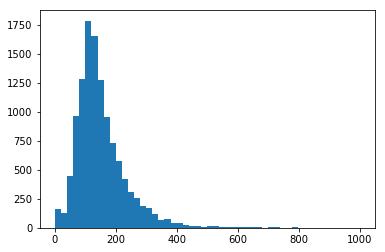

In [14]:
plt.hist(df['BuildingArea'][np.logical_and(df['BuildingArea'].apply(lambda x: not pd.isnull(x)),df['BuildingArea']<1000)],50)

In [15]:
def price_mq(df_col):
    price = df_col[0]
    area = df_col[1]
    if area > 0 and not pd.isnull(area):
        return round(price/area,2)
    else:
        return None

In [16]:
df['Price_EUR'] = df['Price'].apply(lambda x: round(x*0.651199,2))
df['Price_mq'] = df[['Price_EUR','BuildingArea']].apply(price_mq, axis=1)

In [17]:
df[['Price_EUR','Price_mq']].describe()

,Price_EUR,Price_mq
count,2.285000e+04,9.114000e+03
mean,6.880199e+05,7.184242e+03
std,4.210742e+05,3.623536e+04
min,5.535192e+04,1.982000e+01
25%,4.148138e+05,3.532488e+03
50%,5.730551e+05,4.723235e+03
75%,8.465587e+05,6.104990e+03
max,7.293429e+06,2.482371e+06


In [18]:
df[['Price_EUR','Price_mq']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 2 columns):
Price_EUR    22850 non-null float64
Price_mq     9114 non-null float64
dtypes: float64(2)
memory usage: 456.6 KB


In [19]:
import seaborn as sns

TypeError: slice indices must be integers or None or have an __index__ method

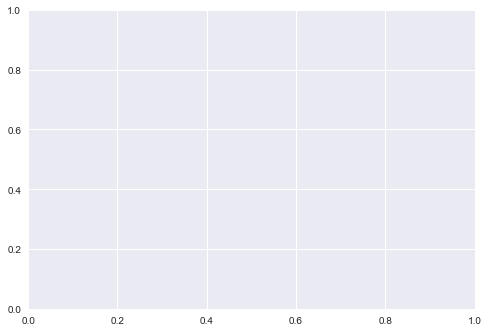

In [20]:
sns.kdeplot(df['Price_mq'][df['Price_mq'].apply(lambda x: not pd.isnull(x))])

In [ ]:
sns.kdeplot(df['Price_mq'][np.logical_and(df['Price_mq'].apply(lambda x: not pd.isnull(x)), df['Price_mq']<1000000)])

In [ ]:
sns.kdeplot(df['Price_mq'][np.logical_and(df['Price_mq'].apply(lambda x: not pd.isnull(x)), df['Price_mq']<20000)])

In [ ]:
df['Price_mq'][df['Price_mq']<20000].describe()

In [ ]:
df[df['Price_mq']>1000000].head(10)

In [ ]:
df[df['BuildingArea']<10].count()

In [ ]:
df['BuildingArea'][df['BuildingArea']<10].describe()

In [ ]:
df_to_plot = df[['Rooms','Price_EUR','Price_mq','Distance','Bedroom2','Bathroom','Car','YearBuilt']].dropna(how='any')

In [ ]:
df_to_plot.describe()

In [ ]:
sns.pairplot(df_to_plot)

In [ ]:
df[df['Rooms']>11]

Before I deal with outliers and Nan I will drop the Landsize, BuildingArea and YearBuilt variables because they have too many missing values. Consequently I have to drop the price_mq variable that I built from the Price and BuildingArea variables.

In [ ]:
df.drop(['Landsize','BuildingArea','YearBuilt','Price_mq'], axis=1, inplace=True)
df.dropna(how='any',inplace=True)

In [ ]:
df.info()

In [ ]:
def check_outliers(dfx):
    dfx['_tmp_'] = ''
    for i in df.columns:
        if(i not in ['Lattitude', 'Longtitude', 'Postcode'] and (dfx[i].dtype == np.float64 or dfx[i].dtype == np.int64)):
            x = dfx[i]
            idx = np.abs(x - x.mean()) / x.std() > 4.0
            dfx.loc[idx,'_tmp_'] = i

In [ ]:
check_outliers(df)
df[df['_tmp_']!='']

In [ ]:
df = df[df['_tmp_']=='']
df.drop(['_tmp_'], axis=1, inplace=True)

In [ ]:
sns.pairplot(df[['Rooms','Price_EUR','Distance','Bedroom2','Bathroom','Car']], kind='reg', diag_kind='kde')

In [ ]:
df['last_addr'] = df['Address'].apply(lambda x: x.split()[-1].lower())

In [ ]:
df.last_addr.nunique()

In [ ]:
df.last_addr.value_counts().head(15)

In [ ]:
final_df = pd.get_dummies(df,columns=df[['last_addr','Suburb','Regionname']],drop_first=True)

In [ ]:
final_df.info()

In [ ]:
y = final_df['Price_EUR']
X = final_df.drop(['Price','Price_EUR', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude'], axis=1)

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
print('Coefficients: \n', lm.coef_)

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
coefficient = pd.DataFrame(lm.coef_,X.columns)
coefficient.columns = ['Coefficient']
coefficient